<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pip install rasterio matplotlib --quiet

Mounted at /content/drive


In [3]:
import os
import glob
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# CHANGE THESE IF NEEDED
folder_path = '/content/drive/MyDrive/NDVIVCI_GeoTiff_Colab'  # Your folder
farm = 'UVS'  # Change to 'LC' for the other farm, or run separately
index = 'NDVI'  # Change to 'VCI' for VCI (12 files?)

file_pattern = f'*{index}_*_{farm}.tif'  # e.g., *NDVI_*_UVS.tif

years = list(range(2019, 2023))  # 2019 to 2023? Adjust if needed (10 years)
months = list(range(1, 13))     # 01 to 12

cmap = 'RdYlGn'   # Your red-yellow-green ramp
vmin, vmax = 0, 1 # For NDVI; for VCI maybe 0-100 or adjust

title = f'{index} Time Series - {farm} Farm'
output_file = f'{index}_grid_{farm}.png'

In [4]:
os.chdir(folder_path)
files = sorted(glob.glob(file_pattern))

print(f"Found {len(files)} files for {index} {farm}")
print("First few:", files[:5])
print("Last few:", files[-5:])

# Expected order: year then month
files_sorted = sorted(files, key=lambda x: (int(x.split('_')[1]), int(x.split('_')[2])))
# If months have leading zero, it should sort correctly as strings too

Found 60 files for NDVI UVS
First few: ['NDVI_2019_01_UVS.tif', 'NDVI_2019_02_UVS.tif', 'NDVI_2019_03_UVS.tif', 'NDVI_2019_04_UVS.tif', 'NDVI_2019_05_UVS.tif']
Last few: ['NDVI_2023_08_UVS.tif', 'NDVI_2023_09_UVS.tif', 'NDVI_2023_10_UVS.tif', 'NDVI_2023_11_UVS.tif', 'NDVI_2023_12_UVS.tif']


/tmp/ipython-input-3147115541.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


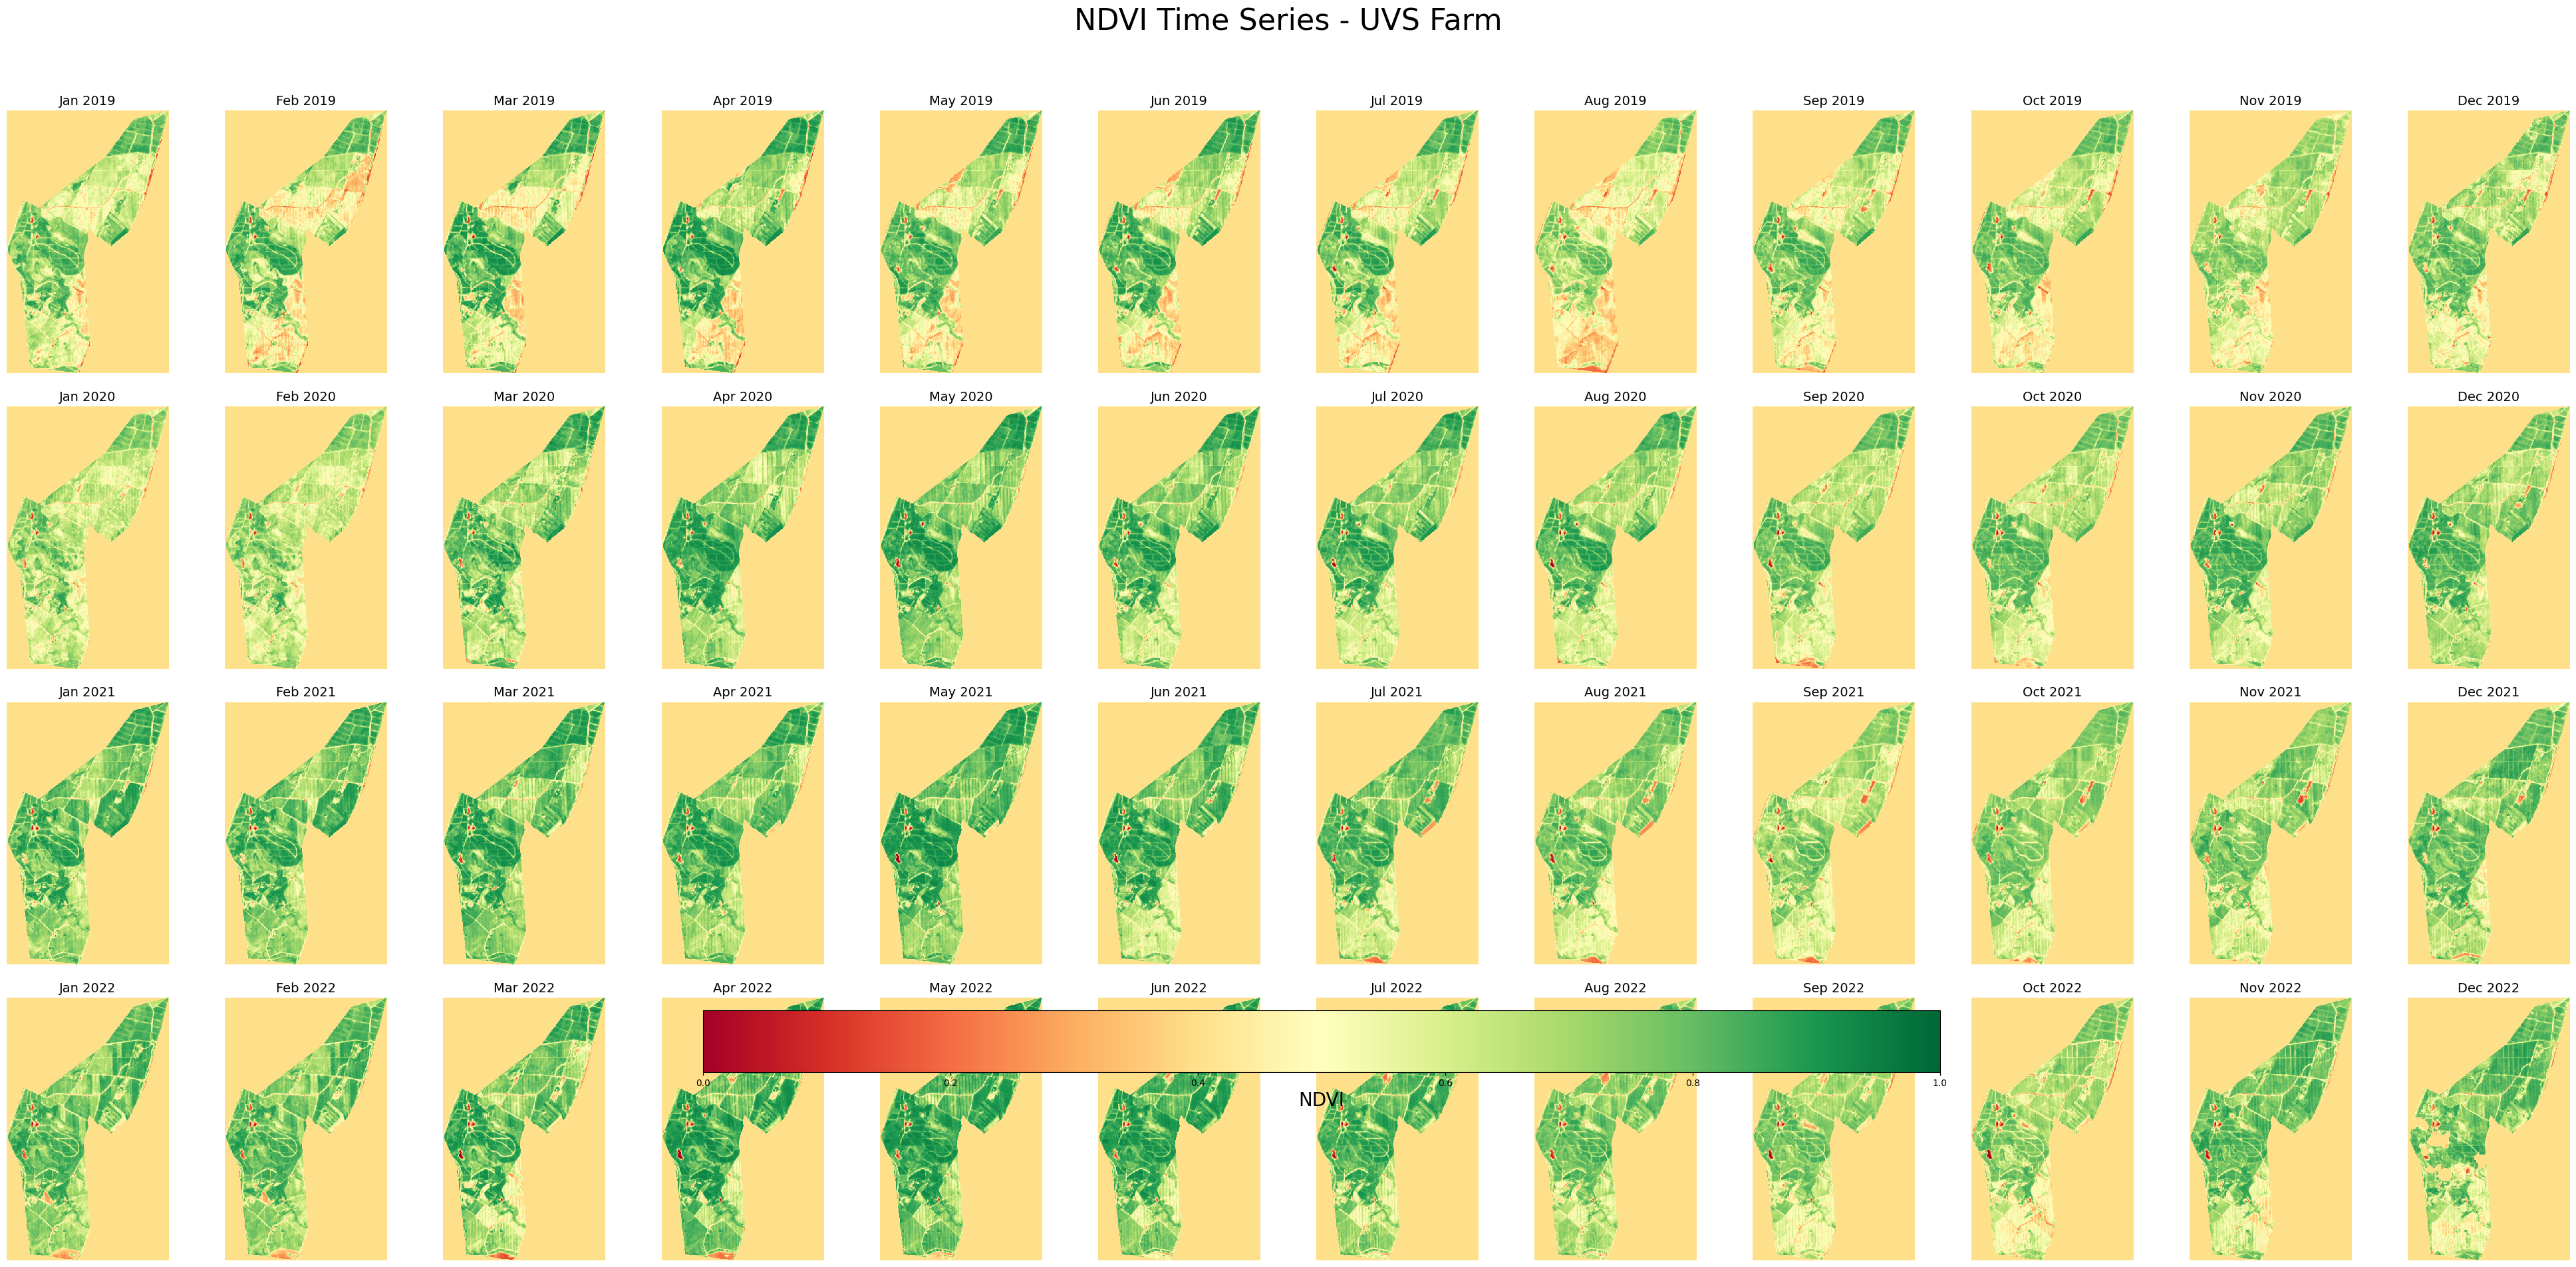

In [7]:
fig, axes = plt.subplots(len(years), len(months), figsize=(40, 20), sharex=True, sharey=True)  # Adjusted for clarity
fig.suptitle(title, fontsize=32, y=0.98)

for i, ax in enumerate(axes.flat):
    year_idx = i // len(months)
    month_idx = i % len(months)

    # Ensure we don't go out of bounds for years
    if year_idx >= len(years):
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.axis('off')
        continue

    expected_year = years[year_idx]
    expected_month = f"{months[month_idx]:02d}"

    # Find matching file
    matching_files = [f for f in files_sorted if str(expected_year) in f and expected_month in f]

    if matching_files:
        file = matching_files[0]  # Take first if duplicate
        with rasterio.open(file) as src:
            data = src.read(1, masked=True)
            show(data, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, interpolation='none')

        # Label: Month Year (e.g., Jan 2019)
        month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][month_idx]
        ax.set_title(f"{month_name} {expected_year}", fontsize=14)
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes, fontsize=12)

    ax.axis('off')  # Clean look, no axes

# Shared colorbar at bottom
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, ax=axes, orientation='horizontal', shrink=0.6, pad=0.02)
cbar.set_label(index, fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()